In [1]:
import pandas as pd # reading in pandas Library  
import numpy as np  # reading in numpy library 
import matplotlib.pyplot as plt  # reading in matplotlib library 
import seaborn as seabornInstance # reding in the seaborn library 
from sklearn.model_selection import train_test_split # reading in sklearn lirbary traiin and test functions
from sklearn.linear_model import LinearRegression # reading in sklearn lirbary linear regression function
from sklearn import metrics # reading in sklearn library as metrics
from sklearn.impute import SimpleImputer # reading in sklearn.impute simple inputer funtion
import plotly.graph_objs as go # reading in plotly.graph as go 
import plotly.offline as py # inport plotly.offline as pyeading
py.init_notebook_mode(connected=True) #  initiating the Plotly Notebook 
# the below line sets the backend of matplotlib to the 'inline' backend 
%matplotlib inline 

In [2]:
# Countires we are selecting
# This name has to match up what what's in teh Yields and teh Temp data 
# We dont know if this matches up yet. We might have to parse and clean if this 
# is the case

# list of specified African countires
countires = [
    "Algeria",
    "Angola",
    "Benin",
    "Botswana",
    "Burkina Faso",
    "Burundi",
    "Cabo Verde",
    "Cameroon",
    "Central African Republic",
    "Chad",
    "Comoros",
    "Congo",
    "Democratic Republic of the Congo",
    "Côte d'Ivoire",
    "Egypt",
    "Eritrea",
    "Eswatini",
    "Ethiopia",
    "Gabon",
    "Gambia",
    "Ghana",
    "Guinea",
    "Guinea-Bissau",
    "Kenya",
    "Liberia",
    "Libya",
    "Madagascar",
    "Malawi",
    "Mali",
    "Mauritania",
    "Mauritius",
    "Morocco",
    "Mozambique",
    "Namibia",
    "Niger",
    "Nigeria",
    "Rwanda",
    "Senegal",
    "Sierra Leone",
    "Somalia",
    "South Africa",
    "South Sudan",
    "Sudan",
    "Sudan (former)",
    "Tanzania",
    "Togo",
    "Uganda",
    "Zambia",
    "Zimbabwe"
]
# We had to exclude South Sudan and Sudan(former) from teh dataset because of the 
# lack of data present in the Cassava_10-14-2019 dataset. This may need to occur for 
# other datasets as well as we go forward.

In [3]:
Yields = pd.read_csv('/home/dgorrell/Downloads/Groundnuts_10-15-2019.csv') # reads in datasert for Groundnuts
Temp = pd.read_csv('/home/dgorrell/Downloads/GlobalTemperatures.csv') # reads in data for global tempeture
Preception = pd.read_csv('/home/dgorrell/Downloads/precipitation_perCountry_perYear.csv') # reads in data for precipitation  
#Yields["Area"].unique()
#Temp[""]

In [4]:
years = np.unique(Temp['dt'].apply(lambda x: x[:4])) # prints the list of years within the tempeture datset in 
# print(years)
mean_temp_world = [] # creating a varible with the name mean_tem_world that contains an empty list
mean_temp_world_uncertainty = [] # creating a variable named mean_temp_world_uncertainty that contains an empty list

for year in years: # Creating a for loop to grab year in our variable years
    mean_temp_world.append(Temp[Temp['dt'].apply( # appending the empty list variable mean_temp_world with the column date "dt" in Tem
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean()) # and then taking the mean of Lan  
    mean_temp_world_uncertainty.append(Temp[Temp['dt'].apply( # appending the empty list mean_temp_world_uncertaitnty to the columndt on Temp
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean()) # taking the 

In [5]:
#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature
global_temp_country = pd.read_csv('/home/dgorrell/Downloads/GlobalLandTemperaturesByCountry.csv') # read ing global land temp data
global_temp_country["Country"].unique() # finding the unique values in the Column Country
global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])] # this variable selects particular countires within our gloabl temp country variable
#global_temp_country_clear["Country"].unique()
global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)', 'Cape Verde'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom', 'Cabo Verde']) # This variable replaces the countires in global tem country cleared with selected names
#global_temp_country_clear["Country"].unique()

In [6]:
mean_temp_year_country = [ [0] * len(years[0:]) for i in range(len(countires))] # creating a variable called mean temp year country where you're multiplying 0 by the length of years in the range of countires 
#print(mean_temp_year_country)
j = 0 # creating a variable named j and making it equal to zero
for country in countires: 
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country] # creating function where it finds the country global temp data and matchesit to our countries variable
    i = 0 # creating variable called i making that equal to 0 
    #print(country)
    for year in years[0:]:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean() # this function finds the years asscoited all temp countues while also avergaging the mean of average temp.
        # print(year)
        i +=1 # creating and counts years of the countries that are presnet within the data by year
        #print(i)
    j += 1 # counts and creats list of countires we are finding 
    #print(j)
    
#mean_temp_year_country

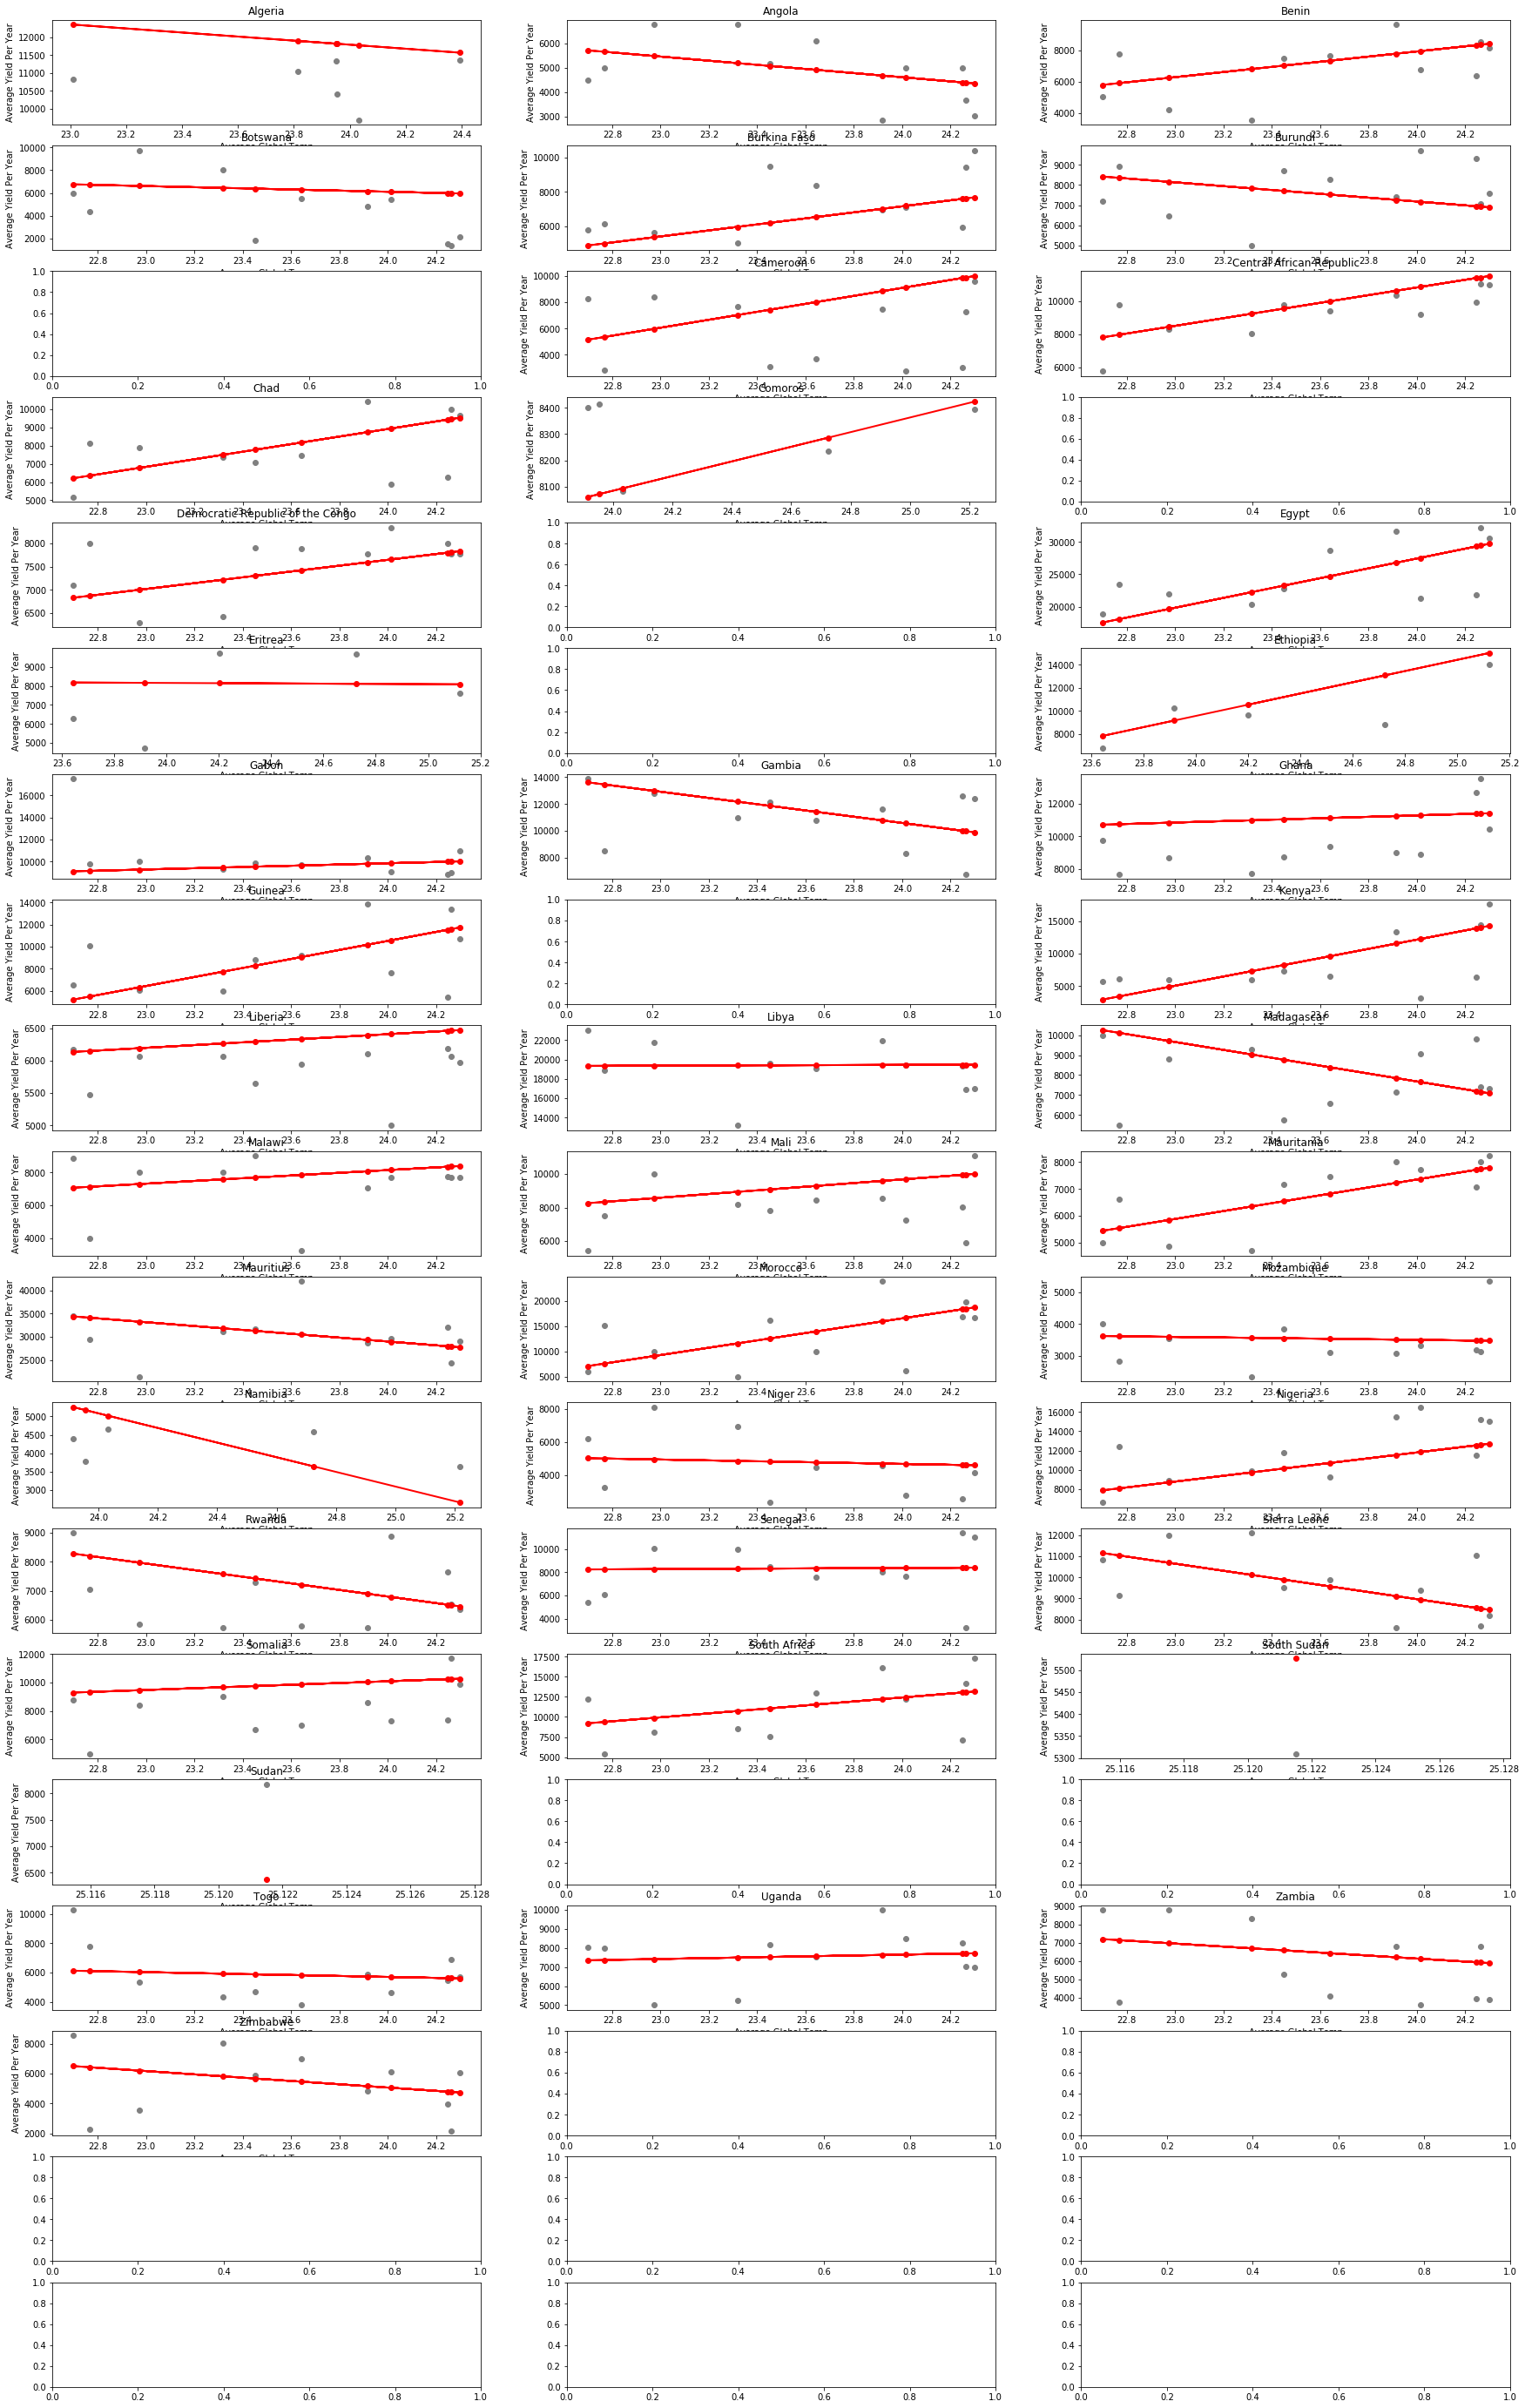

In [9]:
fig, axmatrix = plt.subplots(19,3, figsize = (30, 50)) # creating demnsitons of our plots
ax = axmatrix.flatten() # creates subplots
for iplot, COUNTRY in enumerate (countires):
    # Creating masks for yields country
    maskCountry = Yields["Area"] == COUNTRY # creating varible called maskCountry where we make the area of Yileds = to country
    yearsInCountry = Yields["Year"][maskCountry] # creating list of years presenet in the data for each country sepecified in maskCountry
    yieldsInCountry = Yields["Value"][maskCountry] # creating list of values presenet in the Yields data for each country sepecified in maskCountry
   # print(yieldsInCountry)
    
    # Creating masks for precepitation
    maskPreception = Preception["country"] == COUNTRY # making country in Preception equal to countries variable 
    yearsInPreception = np.array(Preception["year"][maskPreception]).astype("int") # reading the column year as fucntion of maskPreception in an np array as data type int
    preceptionInCountry = Preception["total_rainfall"][maskPreception] # creating a mask for preception data values of total rain fall as a function of the  maskPreception
    
    # the line below creates an if statement that prints outs Preception data if length is greater than 0
    if len(preceptionInCountry) >0:
    
    # Creating masks for temp
        maskedTempCountry = countires == COUNTRY  # making countries in temp data equal to COUNTY
        tempInCountry = np.array(mean_temp_year_country[maskedTempCountry]) # making mean-temp-year-country a fucntion of masked temp country
        yearsInCountryTemp = np.array(years).astype("int") # creating list of years for each country
        #print(yearsInCountryTemp)

        # Making sure that things are over the same year range
        minAll = max([yearsInCountryTemp.min(),yearsInCountry.min(), yearsInPreception.min()]) # gathing the max of all mins 
        maxAll = min([yearsInCountryTemp.max(),yearsInCountry.max(), yearsInPreception.max()]) # gathering the min of all max

        # For Yields 
        yearsYieldsInCountryMasked = yearsInCountry[(yearsInCountry >= minAll) & (yearsInCountry <= maxAll)] # defing the perameters for years in country based on minall and maxall variables
        yieldsInCountryMasked = yieldsInCountry[(yearsInCountry >= minAll) & (yearsInCountry <= maxAll)] # defing the perameters for yields in country based on minall and maxall variables
        # For Temp
        yearsInCountryMasked = yearsInCountryTemp[(yearsInCountryTemp >= minAll) & (yearsInCountryTemp <= maxAll)] # defing the perameters for years in country based on minall and maxall variables
        tempInCountryMasked = tempInCountry[(yearsInCountryTemp >= minAll) & (yearsInCountryTemp <= maxAll)] # defing the perameters for temp in country based on minall and maxall variables

        # Masking All to same year subset
        # Masking Temp
        maskTemp = np.in1d(yearsInCountryMasked, yearsYieldsInCountryMasked) # creates true fales list to determine if any  years are out of the peramters
        tempInCountryMasked = tempInCountryMasked[maskTemp] # creates a value list of the variables in mask temp
        # Masking Yields
        maskYield = np.in1d(yearsYieldsInCountryMasked, yearsInCountryMasked) # creates true fales list to determine if any yield are out of the peramters
        yieldsInCountryMasked = yieldsInCountryMasked[maskYield] # creating a list of yields as a function of maskYield


        # Now Linear Regression
        # Taking out NaNs and reshaping
        X = tempInCountryMasked.reshape(-1,1) # changing shape of dataframe temp in country masked
        y = yieldsInCountryMasked.values.reshape(-1,1) # defining the  values ofyoields in country masked and then changing shape of dataframe
        mask = ~np.isnan(X)  # creating a variable called mask that checks if nan is prenset 
        X = X[mask] # checks if nan is present in X 
        y = y[mask] # check if nan is presne in y
        mask = ~np.isnan(y) # creating a variable called mask that checks if nan is prenset 
        X = X[mask] # check if nan is present in X 
        y = y[mask] # check if nan is presne in y
        X = X.reshape(-1,1) # reshaping the variable X 
        y = y.reshape(-1,1) # reshaping that variable y 
        length_of_real_values = len(X[~np.isnan(X)]) # creates a varible called length_of_real_values that idnetifies that actual length of X
        
        # Doing Linear Regression
        # the line below creates a if statement that finds the value of length_of_real_values thats greateer than 0 
        if length_of_real_values >0:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Creating the train and test models
            # Indext's possible that there are Nan, + or - infintaties that may cause us errors 
            mask = np.isnan(X_train) # creating a variable called mask that finds any nans in X_train 
            X_train = X_train[~mask].reshape(-1,1) # getting rid nans in X_train and reshaping
            y_train = y_train[~mask].reshape(-1,1) # getting rid of nans in X_train and reshaping
            regressor = LinearRegression() # creating a variable called regressor that equalts teh linearregression function
            regressor.fit(X_train, y_train) # training the algorithm
            y_pred = regressor.predict(X_test) # creates prediction points
            df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) # creates a dataframe withsublots for ytest and ypredic
            ax[iplot].scatter(X_test, y_test,  color='gray') # defining details of plot
            ax[iplot].plot(X_test, y_pred, "ro") # defining details of plot
            ax[iplot].plot(X_test, y_pred, color="red", linewidth=2)  # defining details of plot
            ax[iplot].set_xlabel("Average Global Temp") # defining name of of xlabel
            ax[iplot].set_ylabel("Average Yield Per Year") # defining name of ylabel
            ax[iplot].set_title(COUNTRY) # creating title using COUNTRY as the title for each plot
plt.show() # displaying the plot